In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set_palette('Set2')
%matplotlib inline

In [2]:
# Load the processed data
project_root = Path.cwd().parent
processed_data_path = project_root / 'data' / 'processed' / 'hr_dataset.csv'

print(f"Loading data...")
df = pd.read_csv(processed_data_path)
print("Data loaded successfully!")

Loading data...
Data loaded successfully!


In [3]:
# Initial data exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

Dataset Shape: (2000, 11)

First 5 rows:


,EmployeeID,Name,Department,Gender,JobRole,Education,Age,Salary,Bonus,Attrition,TotalCompensation
0,1001,Emp_1,Sales,Male,Manager,High School,39,39239.0,6909,No,46148.0
1,1002,Emp_2,Marketing,Male,Consultant,Masters,53,30416.0,17150,No,47566.0
2,1003,Emp_3,IT,Female,Executive,High School,24,23412.0,28602,No,52014.0
3,1004,Emp_4,Marketing,Female,Engineer,Masters,23,101976.0,5080,No,107056.0
4,1005,Emp_5,Marketing,Male,Executive,PhD,54,44406.0,7083,No,51489.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         2000 non-null   int64  
 1   Name               2000 non-null   object 
 2   Department         1961 non-null   object 
 3   Gender             1961 non-null   object 
 4   JobRole            2000 non-null   object 
 5   Education          2000 non-null   object 
 6   Age                2000 non-null   int64  
 7   Salary             1960 non-null   float64
 8   Bonus              2000 non-null   int64  
 9   Attrition          1960 non-null   object 
 10  TotalCompensation  1960 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 172.0+ KB


In [4]:
# Basic statistics
print("Numerical columns statistics:")
display(df.describe())

print("\nCategorical columns statistics:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

Numerical columns statistics:


,EmployeeID,Age,Salary,Bonus,TotalCompensation
count,2000.000000,2000.000000,1960.000000,2000.000000,1960.000000
mean,2000.500000,40.469000,69234.925510,17676.264000,86881.781633
std,577.494589,10.900112,29729.536674,7231.226538,30420.866873
min,1001.000000,22.000000,-30000.000000,5011.000000,-6323.000000
25%,1500.750000,31.000000,43207.000000,11388.500000,60201.750000
50%,2000.500000,40.000000,69137.500000,17882.500000,86939.000000
75%,2500.250000,50.000000,95121.000000,23732.750000,113048.250000
max,3000.000000,59.000000,119981.000000,29993.000000,149027.000000



Categorical columns statistics:

Name:
Name
Emp_1       1
Emp_1330    1
Emp_1343    1
Emp_1342    1
Emp_1341    1
           ..
Emp_662     1
Emp_661     1
Emp_660     1
Emp_659     1
Emp_2000    1
Name: count, Length: 2000, dtype: int64
Unique values: 2000

Department:
Department
HR            343
Marketing     331
IT            321
Operations    319
Finance       318
Sales         317
I.T             2
HRR             2
Finanace        2
hr              2
Slaes           2
Markting        2
Name: count, dtype: int64
Unique values: 12

Gender:
Gender
Female    1000
Male       955
MALE         1
Fem          1
FEMALE       1
M            1
malee        1
femal        1
Name: count, dtype: int64
Unique values: 8

JobRole:
JobRole
Analyst       416
Consultant    409
Manager       406
Engineer      387
Executive     382
Name: count, dtype: int64
Unique values: 5

Education:
Education
Masters        521
Bachelors      509
High School    490
PhD            480
Name: count, dtype: int64
Uni

In [5]:
# Check for missing values
print("Missing values analysis:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Values'] > 0])

Missing values analysis:


,Missing Values,Percentage
Department,39,1.95
Gender,39,1.95
Salary,40,2.00
Attrition,40,2.00
TotalCompensation,40,2.00


In [6]:
# Cell 6: Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [7]:
# Cell 7: Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (5): ['EmployeeID', 'Age', 'Salary', 'Bonus', 'TotalCompensation']
Categorical columns (6): ['Name', 'Department', 'Gender', 'JobRole', 'Education', 'Attrition']


Distribution of numerical features:


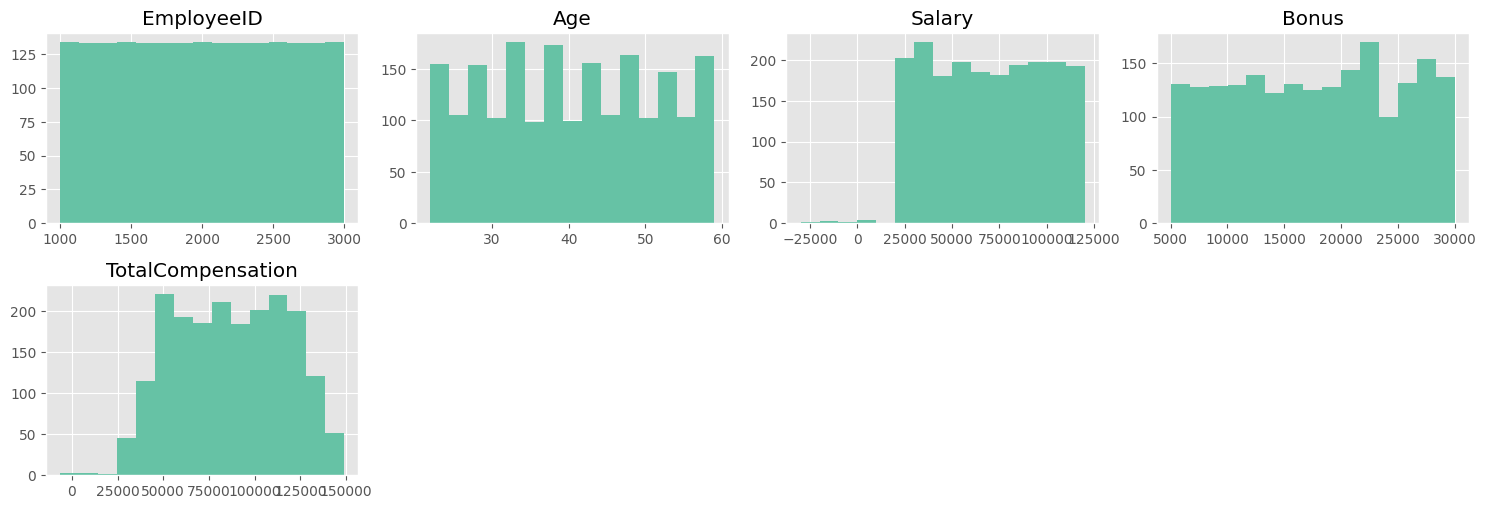

In [9]:
# Cell 8: Distribution of numerical features
print("Distribution of numerical features:")
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.savefig(project_root / 'notebooks' / 'outputs' / 'numerical_distributions.png', 
            dpi=300, bbox_inches='tight')
plt.show()

Distribution of categorical features:


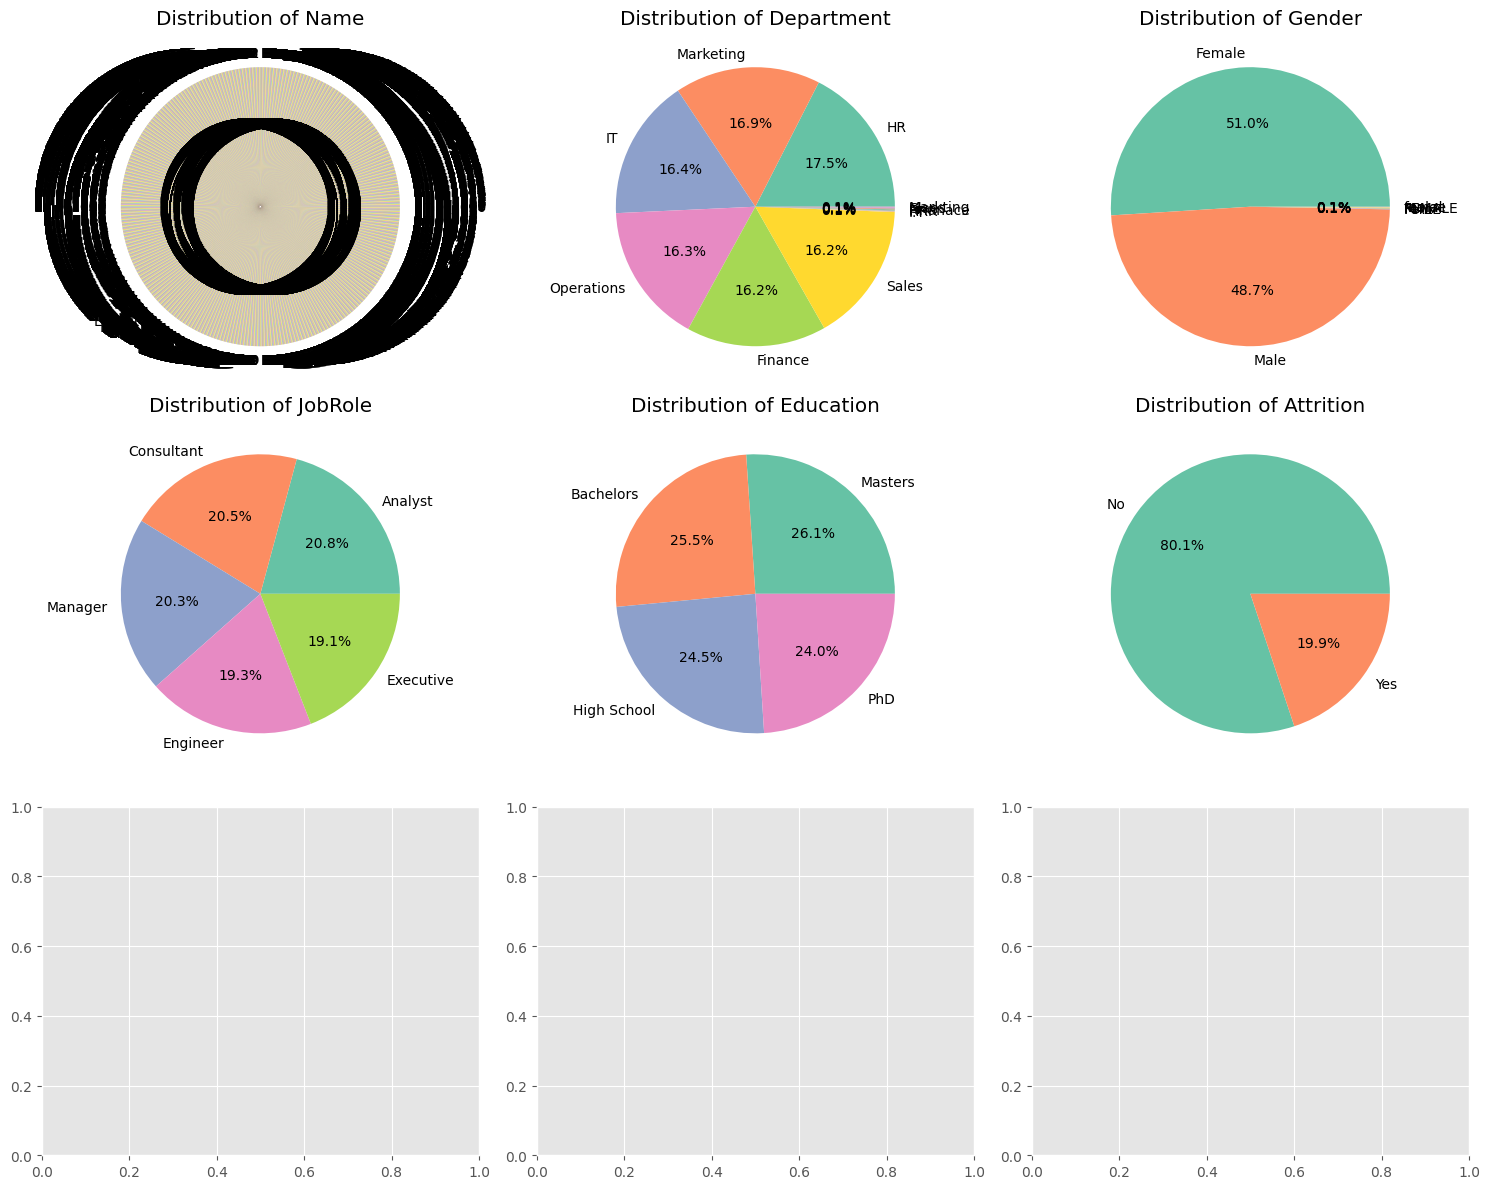

In [10]:
# Cell 9: Distribution of categorical features
print("Distribution of categorical features:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        value_counts = df[col].value_counts()
        axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
        axes[i].set_title(f'Distribution of {col}')
        
plt.tight_layout()
plt.savefig(project_root / 'notebooks' / 'outputs' / 'categorical_distributions.png', 
            dpi=300, bbox_inches='tight')
plt.show()

Correlation matrix:


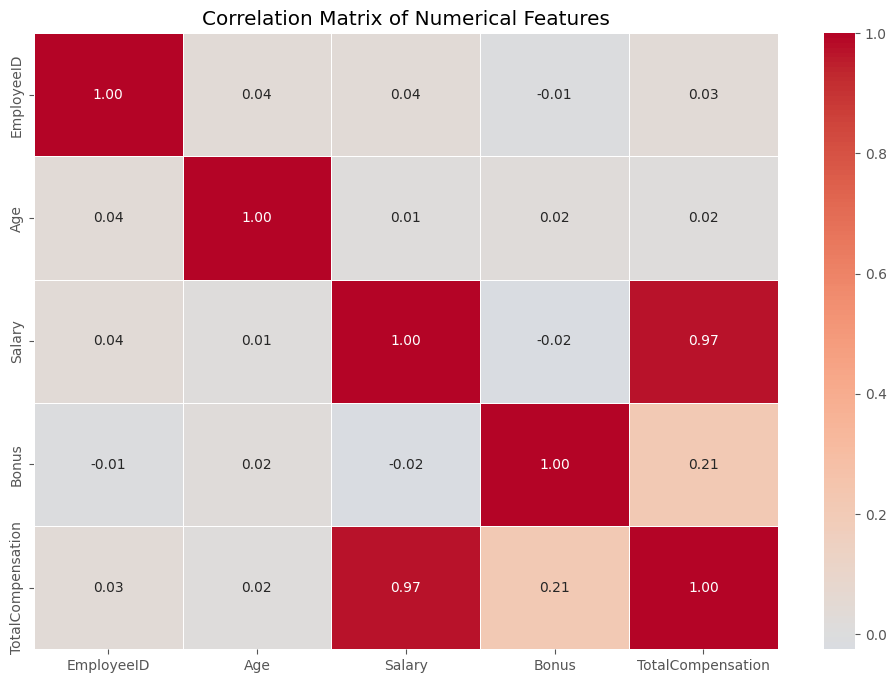

In [11]:
# Cell 10: Correlation analysis
print("Correlation matrix:")
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(project_root / 'notebooks' / 'outputs' / 'correlation_matrix.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Cell 11: Identify highly correlated features (threshold > 0.7)
print("Highly correlated features (|correlation| > 0.7):")
high_corr = correlation_matrix.abs()
high_corr = high_corr.unstack()
high_corr = high_corr.sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.7]
high_corr = high_corr[high_corr < 1]  # Remove self-correlation
display(high_corr)

Highly correlated features (|correlation| > 0.7):


TotalCompensation  Salary               0.971371
Salary             TotalCompensation    0.971371
dtype: float64

Outlier detection for numerical features:


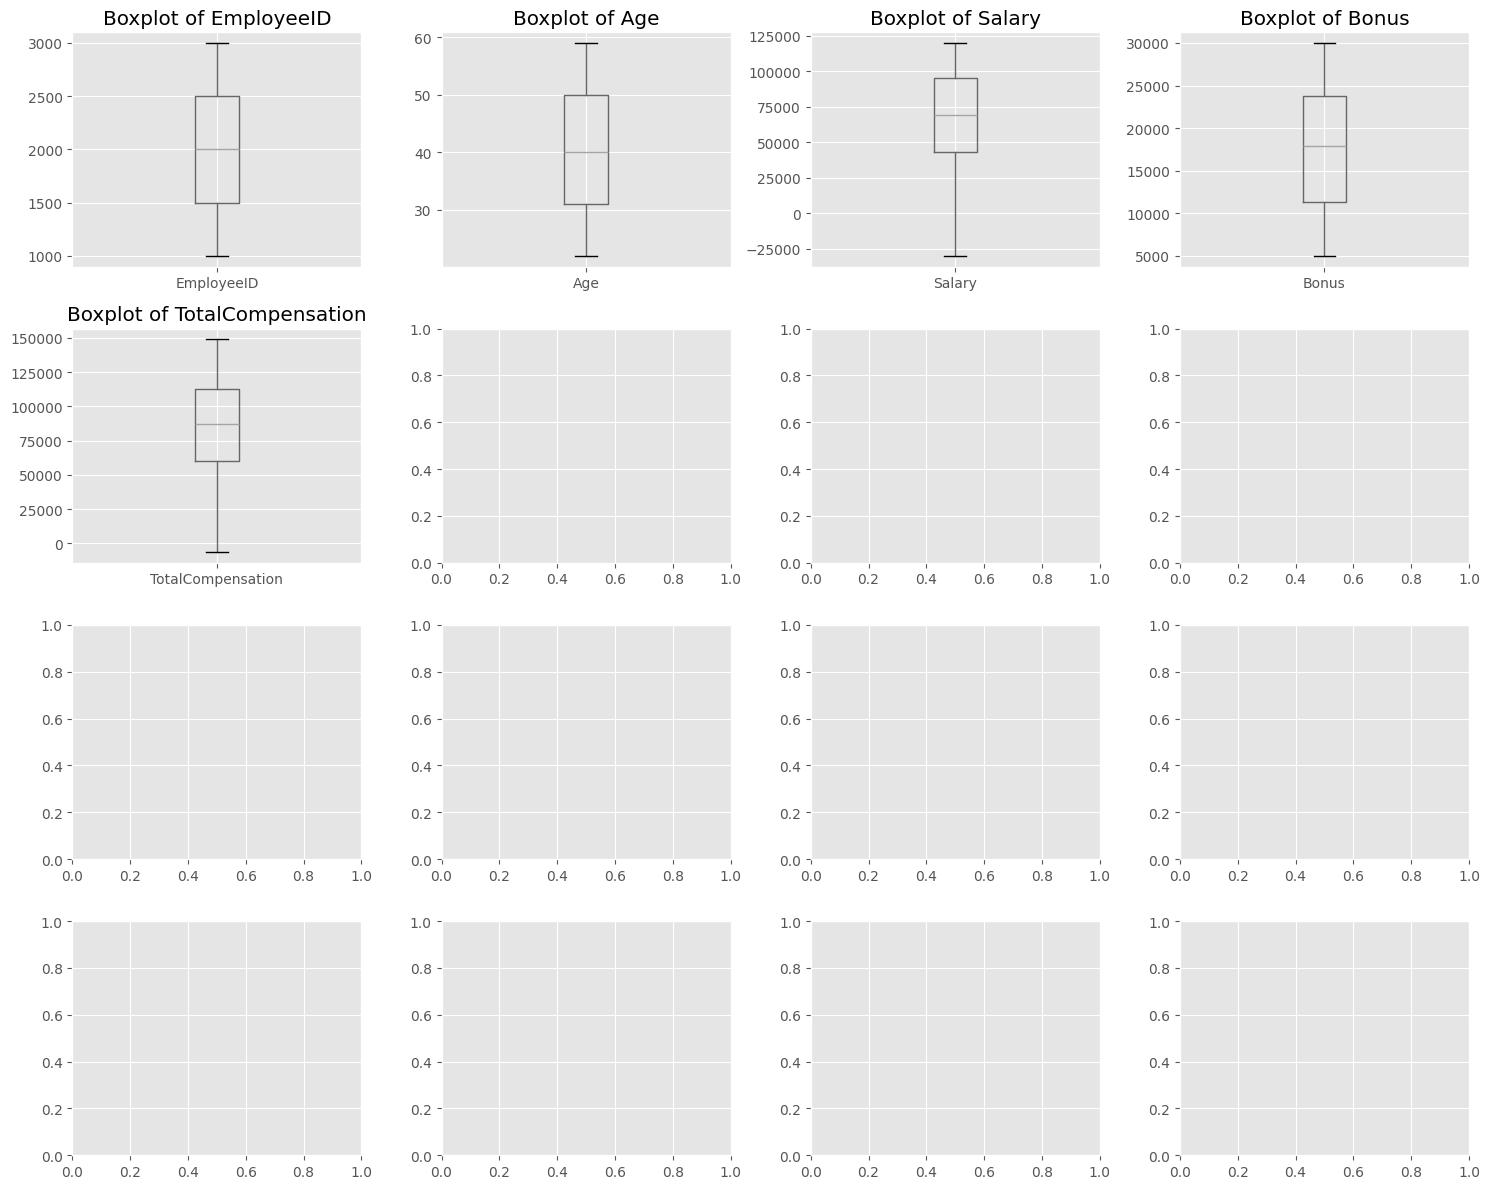

In [13]:
# Cell 12: Check for outliers using boxplots
print("Outlier detection for numerical features:")
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        
plt.tight_layout()
plt.savefig(project_root / 'notebooks' / 'outputs' / 'outlier_detection.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Cell 13: Save key findings to a text file
output_path = project_root / 'notebooks' / 'outputs' / 'eda_summary.txt'

with open(output_path, 'w') as f:
    f.write("HR ANALYTICS - EDA SUMMARY REPORT\n")
    f.write("="*50 + "\n\n")
    
    f.write(f"Dataset Shape: {df.shape}\n")
    f.write(f"Number of features: {len(df.columns)}\n")
    f.write(f"Number of records: {len(df)}\n\n")
    
    f.write("MISSING VALUES ANALYSIS:\n")
    f.write("-"*30 + "\n")
    f.write(missing_df[missing_df['Missing Values'] > 0].to_string() + "\n\n")
    
    f.write(f"Duplicate rows: {df.duplicated().sum()}\n\n")
    
    f.write("DATA TYPES:\n")
    f.write("-"*30 + "\n")
    f.write(f"Numerical columns: {len(numerical_cols)}\n")
    f.write(f"Categorical columns: {len(categorical_cols)}\n\n")
    
    f.write("HIGHLY CORRELATED FEATURES (|r| > 0.7):\n")
    f.write("-"*30 + "\n")
    f.write(high_corr.to_string() + "\n")

print(f"EDA summary saved!!")

EDA summary saved!!


In [16]:
# Cell 14: Display final dataset information
print("EDA COMPLETED SUCCESSFULLY!")
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

EDA COMPLETED SUCCESSFULLY!
Dataset contains 2000 rows and 11 columns
Missing values: 198
Duplicate rows: 0
